In [11]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

u = np.ones((25, 100))
alpha = 0.25
N = 1000

for i in range(N):
    u[1:-1, 1:-1] += alpha * (u[:-2, 1:-1] + u[2:, 1:-1] + u[1:-1, :-2]+u[1:-1, 2:] -4 * u[1:-1, 1:-1])

In [16]:
def glatting(file, k):
    orig_im = imageio.imread(file)
    
    plt.imshow(orig_im)
    
    
    

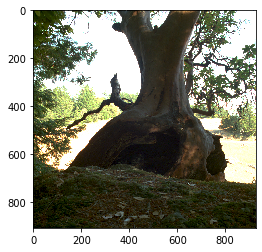

In [17]:
filepath = "..\hdr-bilder\Tree\Tree_00032.png"
constant = 10

glatting(filepath, constant)